In [1]:
import numpy as np
import pickle
import keras
import cv2
from keras.models import Sequential,load_model
from keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator,array_to_img,img_to_array,load_img
import os
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
train_dir=r'C:\Users\hemant\Downloads\Compressed\balanced emnist'      #putting r in beginning to convert normal string to raw string which considers \ as part of string
val_dir=r'C:\Users\hemant\Downloads\Compressed\EMNIST\Validation'
classes=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

In [ ]:
train_data=[]
train_label=[]

for ele in classes:
    class_path=os.path.join(train_dir,ele)
    class_label=classes.index(ele)                       ##using index as label.
    directory = os.listdir(class_path)
    np.random.shuffle(directory)
    limit=np.min((len(directory),8000))
    for img in directory[:limit]:
        image=cv2.imread(os.path.join(class_path,img))
        image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
        train_data.append(image)
        train_label.append(class_label)
        

In [ ]:
# to save train lists
file = "train_data_list_8000.pkl"
fileobj=open(file,'wb')
pickle.dump(train_data,fileobj)
fileobj.close()

file = "train_label_list_8000.pkl"
fileobj=open(file,'wb')
pickle.dump(train_label,fileobj)
fileobj.close()

In [ ]:
val_data=[]
val_label=[]
for ele in classes:
    class_path=os.path.join(val_dir,ele)
    class_label=classes.index(ele)                       ##using index as label.
    for img in os.listdir(class_path):
        image=cv2.imread(os.path.join(class_path,img))
        image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
        
        val_data.append(image)
        val_label.append(class_label)

In [ ]:
#to save val lists
file = "val_data_list_8000.pkl"
fileobj=open(file,'wb')
pickle.dump(val_data,fileobj)
fileobj.close()

file = "val_label_list_8000.pkl"
fileobj=open(file,'wb')
pickle.dump(val_label,fileobj)
fileobj.close()

In [ ]:
#to load train_data list
file="train_data_list_8000.pkl"
fileobj=open(file,'rb')
train_data=pickle.load(fileobj)

#to load train_label
file="train_label_list_8000.pkl"
fileobj=open(file,'rb')
train_label=pickle.load(fileobj)


In [ ]:
#to load val data list
file="val_data_list_8000.pkl"
fileobj=open(file,'rb')
val_data=pickle.load(fileobj)

#to load val label list
file="val_label_list_8000.pkl"
fileobj=open(file,'rb')
val_label=pickle.load(fileobj)

In [ ]:
no_of_train_samples=len(train_data)
no_of_val_samples=len(val_data)

In [ ]:
train_data=np.array(train_data)
train_label=np.array(train_label)

val_data=np.array(val_data)
val_label=np.array(val_label)

In [ ]:
from keras.utils import to_categorical
train_label=to_categorical(train_label)
val_label=to_categorical(val_label)

In [ ]:
#print(train_label[0])
#print(val_label[0])

In [ ]:
train_data=train_data.reshape(no_of_train_samples,32,32,1)
val_data=val_data.reshape(no_of_val_samples,32,32,1)
from sklearn.utils import shuffle
train_data,train_label=shuffle(train_data,train_label)

In [ ]:
print(train_data.shape)

In [ ]:
model=Sequential()

In [ ]:
layer_1 = Conv2D(32, kernel_size=3, activation='relu', input_shape=(32,32,1))
layer_2 = Conv2D(64, kernel_size=3, activation='relu')
layer_3 = Flatten()
layer_4 = Dense(35, activation='softmax')

In [ ]:
model.add(layer_1)
model.add(layer_2)
model.add(layer_3)
model.add(layer_4)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()


In [ ]:
print(train_data.shape)
print(val_data.shape)

In [ ]:
model.fit(x=train_data,y=train_label,validation_data=(val_data,val_label),epochs=5)       

In [ ]:
model.save('model1.h5')      #model1 val_acc ~87%

In [3]:
model=load_model('model1.h5')

In [ ]:
#for testing on images from validation set
test_list=[]

test_dir=r'C:\Users\hemant\Desktop\test'
for img in os.listdir(test_dir):
    image=cv2.imread(os.path.join(test_dir,img))
    image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    test_list.append(image)
    


In [4]:
#preprocessing
test_images=[]                                 #to store processed digits and characters images
contour_coordinates=[]                         # to store coordinates of contours for putting text
img = cv2.imread("test3.png")
img_original=img
original_width,original_height,_=img_original.shape
img=cv2.GaussianBlur(img,(5,5),0)
img= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
_, img = cv2.threshold(img, 80, 255, cv2.THRESH_BINARY_INV)     #for converting to white digit and blackbackground


_, contours, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(img_original,contours,-1,(0,0,255),2)

for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    if w>=original_width-10 or h>=original_height-10:          #to ignore the contour of whole image
        continue
    contour_coordinates.append([x,y,w,h])
    cv2.rectangle(img_original,(x,y),(x+w,y+h),(0,255,0),4)
    cropped=img[y:y+h,x:x+w]
    
    kernel=np.ones((5,5),np.uint8)
    cropped=cv2.dilate(cropped,kernel,iterations=1)
   
    cropped=cv2.resize(cropped,(22,22))
    
    padded=np.pad(cropped, (5,5), "constant", constant_values=0)   #to put digit in center of image
   
    test_images.append(padded)
  
cv2.imshow("originl",img_original)
cv2.waitKey(0)
cv2.destroyAllWindows()
'''
for img in test_images:
    plt.imshow(img)
    plt.show()
'''

'\nfor img in test_images:\n    plt.imshow(img)\n    plt.show()\n'

In [5]:
test_images=np.array(test_images)
test_images=test_images.reshape(len(test_images),32,32,1)
predictions=model.predict(test_images)


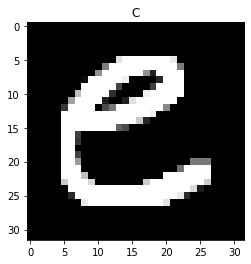

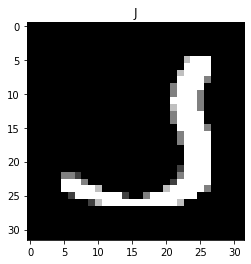

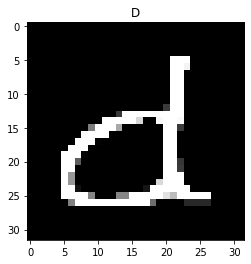

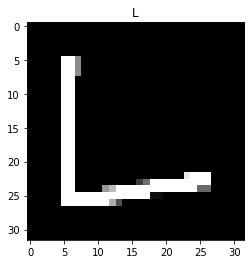

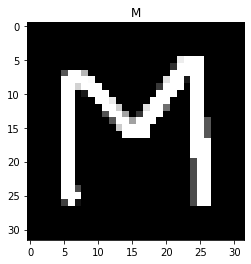

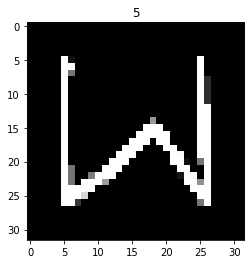

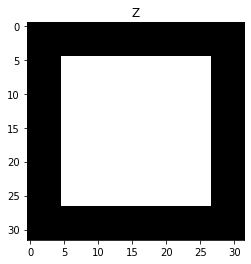

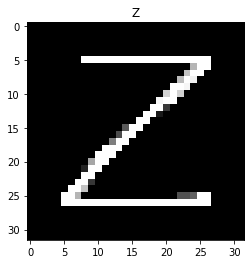

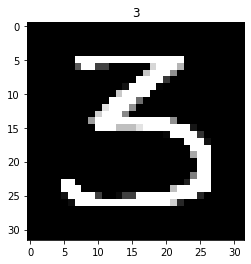

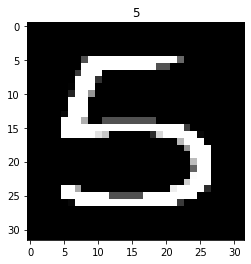

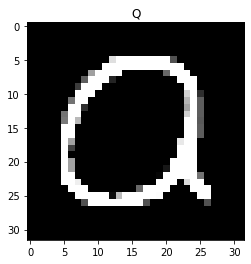

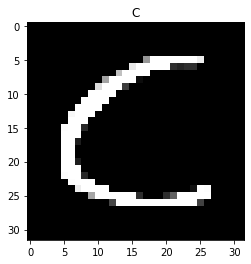

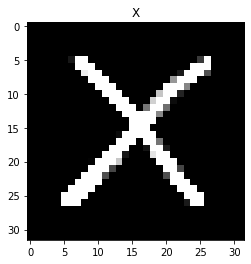

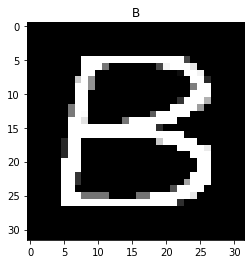

In [6]:
#plot images and prediction using matlab
i=0                                                             #for iterating in predictions
for img in test_images:
    plt.imshow(img,cmap="gray")
    res=classes[np.argmax(predictions[i])]
    i+=1
    plt.title(res)
    plt.show()

In [7]:
#put predictions on original image
import math
for val in contour_coordinates:
    x,y,w,h=val
    
    text=str(classes[np.argmax(predictions[contour_coordinates.index(val)])])
    org=(math.floor(x+w//2),y-5)
    img_original=cv2.putText(img_original,text,org,cv2.FONT_HERSHEY_SIMPLEX ,1,(0,0,0),1)
    
cv2.imshow("originl",img_original)
cv2.waitKey(0)
cv2.destroyAllWindows()